# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv("C:/Users/a.nemogushcha/Downloads/yulu_rental.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

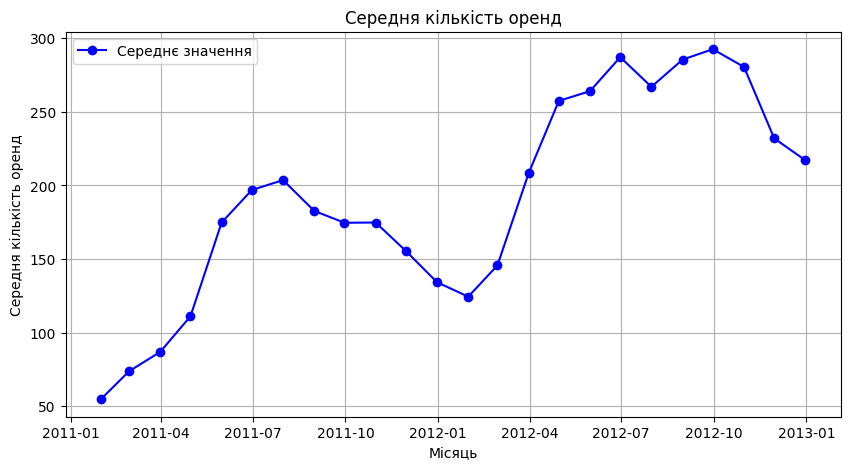

In [7]:
#Matplotlib
months = monthly_avg.index
values = monthly_avg.values

plt.figure(figsize=(10,5))
plt.plot(months, values, marker='o', linestyle='-', color='blue', label='Середнє значення')
plt.title('Середня кількість оренд')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд')
plt.grid(True)
plt.legend()
plt.show()

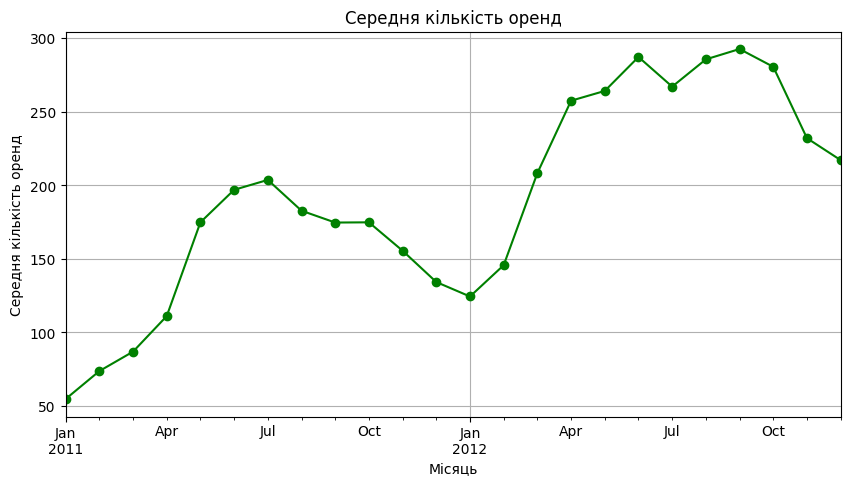

In [9]:
monthly_avg = df.resample('ME')['count'].mean()

monthly_avg.plot(marker='o', color='green', figsize=(10,5), title='Середня кількість оренд')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд')
plt.grid(True)
plt.show()

Сильної різниці не бачу. Тільки Графік через Pandas займає менше коду

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [11]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

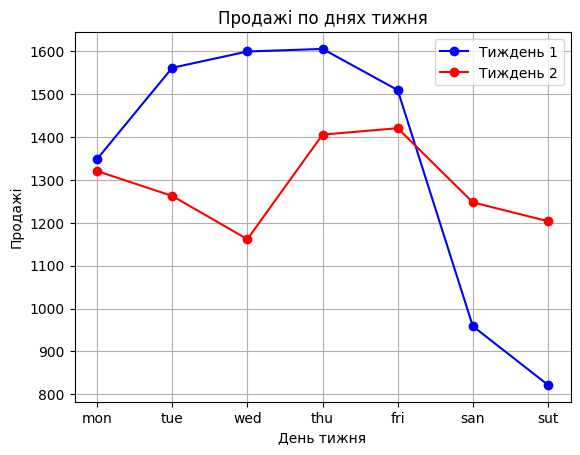

In [16]:
plt.plot(days, sales_week1, label='Тиждень 1', marker='o', color='blue')
plt.plot(days, sales_week2, label='Тиждень 2', marker='o', color='red')
plt.title('Продажі по днях тижня')
plt.xlabel('День тижня')
plt.ylabel('Продажі')
plt.xticks(days, ['mon', 'tue', 'wed', 'thu', 'fri', 'san', 'sut']) 
plt.legend()
plt.grid(True)
plt.show()

Тиждень 2 виглядає більш стабільним
На 1 видно різьке падіння 

## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

In [18]:
import matplotlib.pyplot as plt

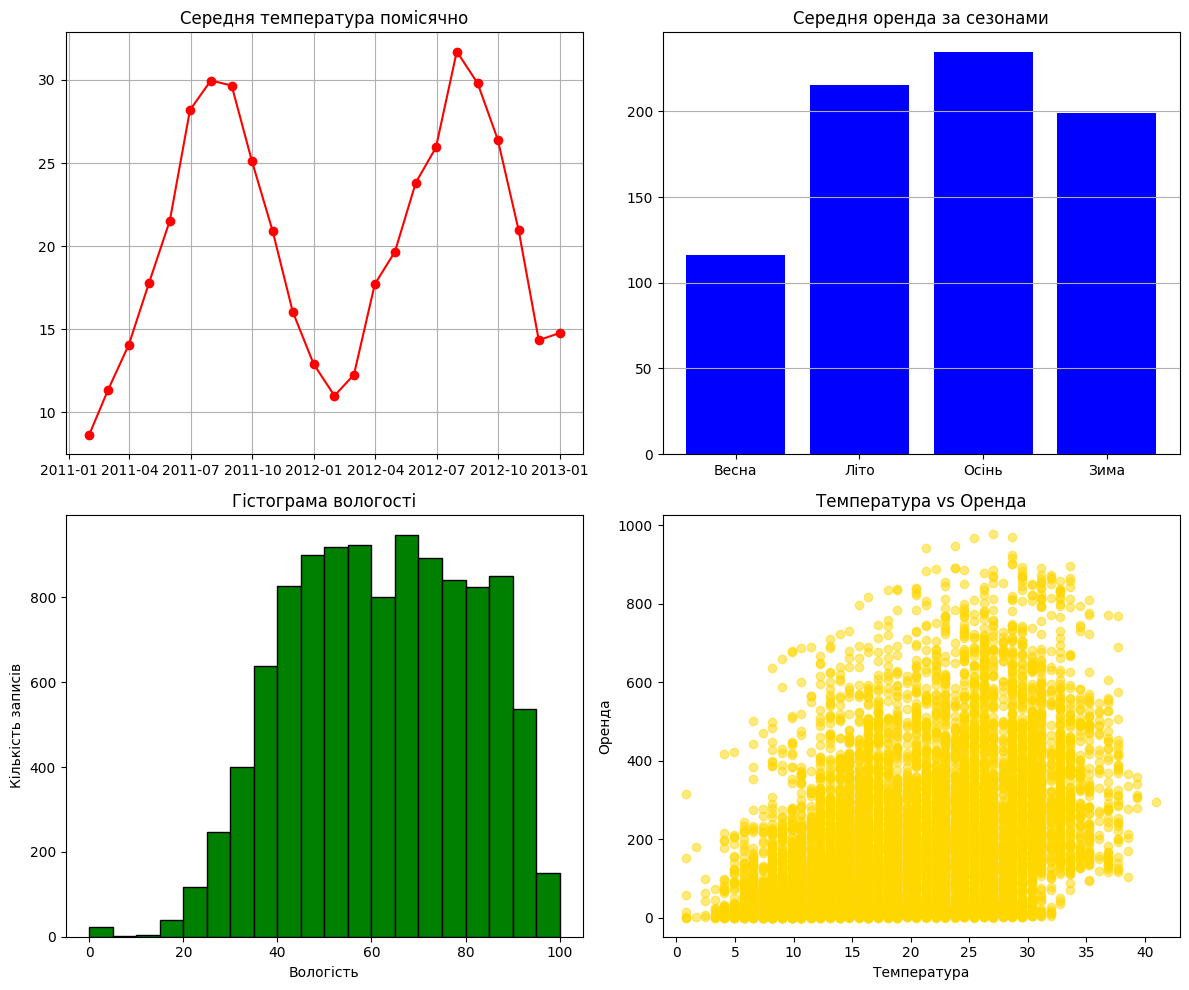

In [22]:
fig = plt.figure(figsize=(12, 10))

# 1. Лінійний графік середньої температури помісячно
plt.subplot(2, 2, 1)
monthly_temp = df.resample('ME')['temp'].mean()
plt.plot(monthly_temp, marker='o', color='red')
plt.title('Середня температура помісячно')
plt.grid(True)

# 2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
plt.subplot(2, 2, 2)
season_avg = df.groupby('season')['count'].mean()
plt.bar(season_avg.index, season_avg.values, color='blue')
plt.xticks([1, 2, 3, 4], ['Весна', 'Літо', 'Осінь', 'Зима'])
plt.title('Середня оренда за сезонами')
plt.grid(axis='y')

# 3. Гістограма вологості за всіма погодинними вимірами.
plt.subplot(2, 2, 3)
plt.hist(df['humidity'], bins=20, color='green', edgecolor='black')
plt.title('Гістограма вологості')
plt.xlabel('Вологість')
plt.ylabel('Кількість записів')

# 4. Scatter plot температури vs кількості оренд.
plt.subplot(2, 2, 4)
plt.scatter(df['temp'], df['count'], alpha=0.5, color='gold')
plt.title('Температура vs Оренда')
plt.xlabel('Температура')
plt.ylabel('Оренда')

plt.tight_layout()
plt.show()Стовпчикова діаграма середньої годинної кількості оренд за сезонами.

## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

In [2]:
import matplotlib.pyplot as plt

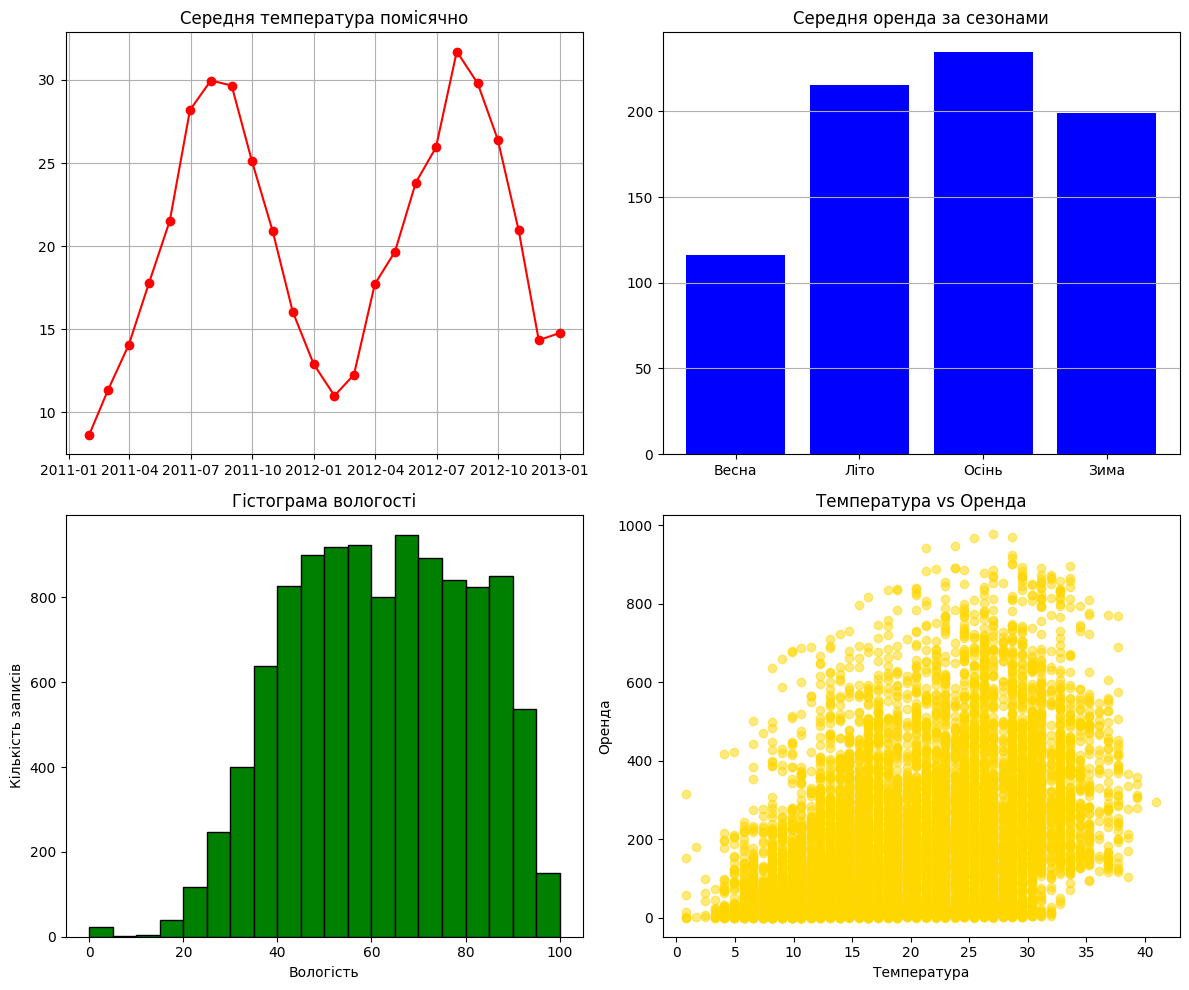

In [5]:

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# 1. Лінійний графік середньої температури помісячно
monthly_temp = df.resample('ME')['temp'].mean()
ax[0, 0].plot(monthly_temp, marker='o', color='red')
ax[0, 0].set_title('Середня температура помісячно')
ax[0, 0].grid(True)

# 2. Стовпчикова діаграма оренд за сезонами
season_avg = df.groupby('season')['count'].mean()
ax[0, 1].bar(season_avg.index, season_avg.values, color='blue')
ax[0, 1].set_xticks([1, 2, 3, 4])
ax[0, 1].set_xticklabels(['Весна', 'Літо', 'Осінь', 'Зима'])
ax[0, 1].set_title('Середня оренда за сезонами')
ax[0, 1].grid(axis='y')

# 3. Гістограма вологості за всіма погодинними вимірами.
ax[1, 0].hist(df['humidity'], bins=20, color='green', edgecolor='black')
ax[1, 0].set_title('Гістограма вологості')
ax[1, 0].set_xlabel('Вологість')
ax[1, 0].set_ylabel('Кількість записів')

# 4. Scatter plot температури vs кількості оренд.
ax[1, 1].scatter(df['temp'], df['count'], alpha=0.5, color='gold')
ax[1, 1].set_title('Температура vs Оренда')
ax[1, 1].set_xlabel('Температура')
ax[1, 1].set_ylabel('Оренда')

plt.tight_layout()
plt.show()


plt.subplot() - нова функція для нового графіка, менш гнучкий
plt.subplots() -  дозволяє більш детально налаштовувати кожен графік 

## Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

In [7]:
import numpy as np
import matplotlib.pyplot as plt

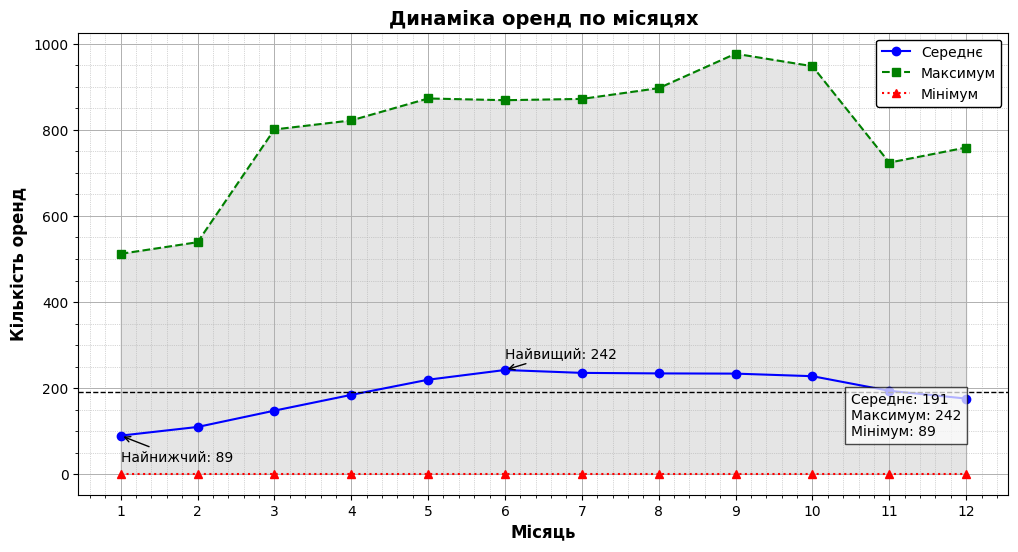

In [9]:
# Дані: середнє, максимум і мінімум оренд по місяцях
monthly = df.resample('ME')['count']
mean_vals = monthly.mean().groupby(lambda x: x.month).mean()
max_vals = monthly.max().groupby(lambda x: x.month).max()
min_vals = monthly.min().groupby(lambda x: x.month).min()

months = np.arange(1, 13)

# --- Побудова графіка ---
fig, ax = plt.subplots(figsize=(12, 6))

# Три лінії з різними стилями
ax.plot(months, mean_vals, label='Середнє', marker='o', linestyle='-', color='blue')
ax.plot(months, max_vals, label='Максимум', marker='s', linestyle='--', color='green')
ax.plot(months, min_vals, label='Мінімум', marker='^', linestyle=':', color='red')

# Заливка області між мінімумом і максимумом
ax.fill_between(months, min_vals, max_vals, color='gray', alpha=0.2)

# Горизонтальна лінія середнього за рік
annual_mean = mean_vals.mean()
ax.axhline(y=annual_mean, color='black', linestyle='--', linewidth=1)

# Анотації
ax.annotate(f'Найвищий: {mean_vals.max():.0f}', 
            xy=(mean_vals.idxmax(), mean_vals.max()), 
            xytext=(mean_vals.idxmax(), mean_vals.max()+30),
            arrowprops=dict(facecolor='black', arrowstyle='->'))

ax.annotate(f'Найнижчий: {mean_vals.min():.0f}', 
            xy=(mean_vals.idxmin(), mean_vals.min()), 
            xytext=(mean_vals.idxmin(), mean_vals.min()-60),
            arrowprops=dict(facecolor='black', arrowstyle='->'))

# Легенда з оформленням (без set_shadow)
legend = ax.legend(loc='upper right', fontsize=10, frameon=True)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
frame.set_alpha(1)

# Двошарова сітка
ax.grid(which='major', linestyle='-', linewidth=0.7)
ax.grid(which='minor', linestyle=':', linewidth=0.5)
ax.minorticks_on()

# Текстовий блок зі статистикою
stats_text = (f"Середнє: {annual_mean:.0f}\n"
              f"Максимум: {mean_vals.max():.0f}\n"
              f"Мінімум: {mean_vals.min():.0f}")
ax.text(10.5, mean_vals.min(), stats_text, fontsize=10, 
        bbox=dict(facecolor='white', alpha=0.7))

# Оформлення
ax.set_title('Динаміка оренд по місяцях', fontsize=14, fontweight='bold')
ax.set_xlabel('Місяць', fontsize=12, fontweight='bold')
ax.set_ylabel('Кількість оренд', fontsize=12, fontweight='bold')
ax.set_xticks(months)

plt.show()

1. Анотації дозволяють швидко знайти максимуми, мінімуми, важливі події прямо на графіку
2. Функція fill_between() дозволяє бачити різницю між мінімумом та максимумом
3. Показує коротку статистику, щоб було зручно і швидко зрозуміти дані.